In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_genre_counts(df: pd.DataFrame):
    genre_df = df.assign(genre=df['genres'].str.split('\|')).explode('genre')
    genre_counts = genre_df['genre'].value_counts().sort_values().reset_index().rename(columns={'index':'genre', 'genre':'count'})

    plt.figure(figsize=(12, 6))
    sns.barplot(x='count', y='genre', data=genre_counts, palette='viridis')
    plt.title('Count of Movies for Each Genre')
    plt.xlabel('Count')
    plt.ylabel('Genre')
    plt.show()

def plot_genre_ratings(df: pd.DataFrame):
    genre_ratings = df.assign(genre=df['genres'].str.split('\|')).explode('genre').groupby('genre')['rating'].mean().sort_values().reset_index()

    plt.figure(figsize=(12, 6))
    sns.barplot(x='rating', y='genre', data=genre_ratings, palette='viridis')
    plt.title('Distribution of Average Movie Ratings for Each Genre')
    plt.xlabel('Average Rating')
    plt.ylabel('Genre')
    plt.show()

def box_plot_genre_ratings(df: pd.DataFrame):
    genre_ratings = df.assign(genre=df['genres'].str.split('\|')).explode('genre')

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='rating', y='genre', data=genre_ratings, palette='viridis')
    plt.title('Distribution of Movie Ratings for Each Genre')
    plt.xlabel('Rating')
    plt.ylabel('Genre')
    plt.show()

def plot_most_rated_movies(df: pd.DataFrame, N=10):
    most_rated_movies = df.groupby('title')['rating'].agg(['mean', 'count']).reset_index().sort_values(['count', 'mean'], ascending=False).head(N)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='count', y='title', data=most_rated_movies, palette='viridis')
    plt.title('Top 10 Most-rated Movies')
    plt.xlabel('Number of Ratings')
    plt.ylabel('Movie Title')
    plt.show()

def plot_popular_genres(df: pd.DataFrame, N=5):
    popular_genre_df = df.assign(genre=df['genres'].str.split('\|')).explode('genre').groupby('genre')['rating'].agg(['mean', 'count']).reset_index().sort_values(['count', 'mean'], ascending=False).head(N)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='mean', y='genre', data=popular_genre_df, palette='viridis')
    plt.title('Top 5 Popular Genres')
    plt.xlabel('Average Rating')
    plt.ylabel('Genre')
    plt.show()

def plot_movies_per_year(df: pd.DataFrame):
    year_wise_df = df.groupby('year')['title'].count().reset_index().rename(columns={'title':'num_movies'})

    plt.figure(figsize=(12, 6))
    plt.plot(year_wise_df['year'], year_wise_df['num_movies'])
    plt.title('Number of Movies Released Per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Movies')
    plt.show()

def plot_avg_ratings_per_year(df: pd.DataFrame):
    year_wise_df = df.groupby('year')['rating'].mean().reset_index()

    plt.figure(figsize=(12, 6))
    plt.plot(year_wise_df['year'], year_wise_df['rating'])


    plt.title('Average Movie Ratings Per Year')
    plt.xlabel('Year')
    plt.ylabel('Average Rating')
    plt.show()


In [2]:
import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime

movies_df = pd.read_csv('data/movies.csv')
ratings_df = pd.read_csv('data/ratings.csv')
tags_df = pd.read_csv('data/tags.csv')

merged_df = pd.merge(movies_df, ratings_df, on='movieId', how='inner')




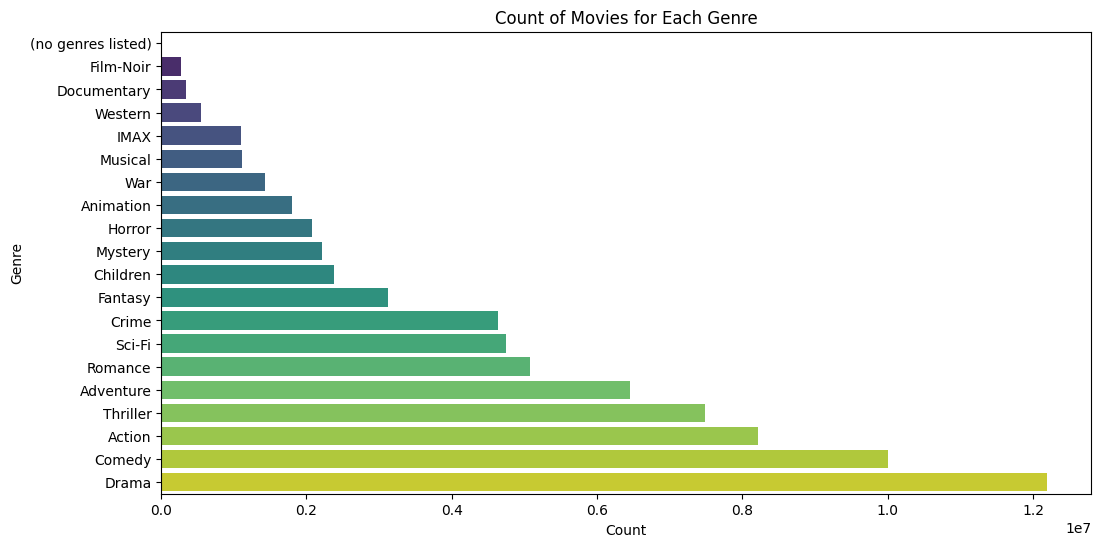

In [3]:
plot_genre_counts(merged_df)


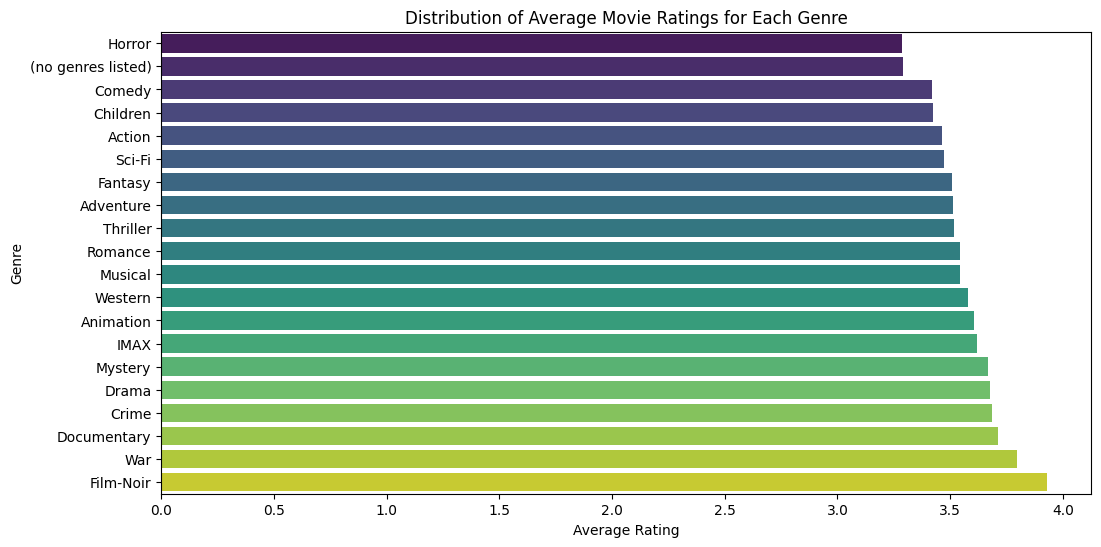

In [4]:
plot_genre_ratings(merged_df)


In [8]:
box_plot_genre_ratings(merged_df)


: 

: 

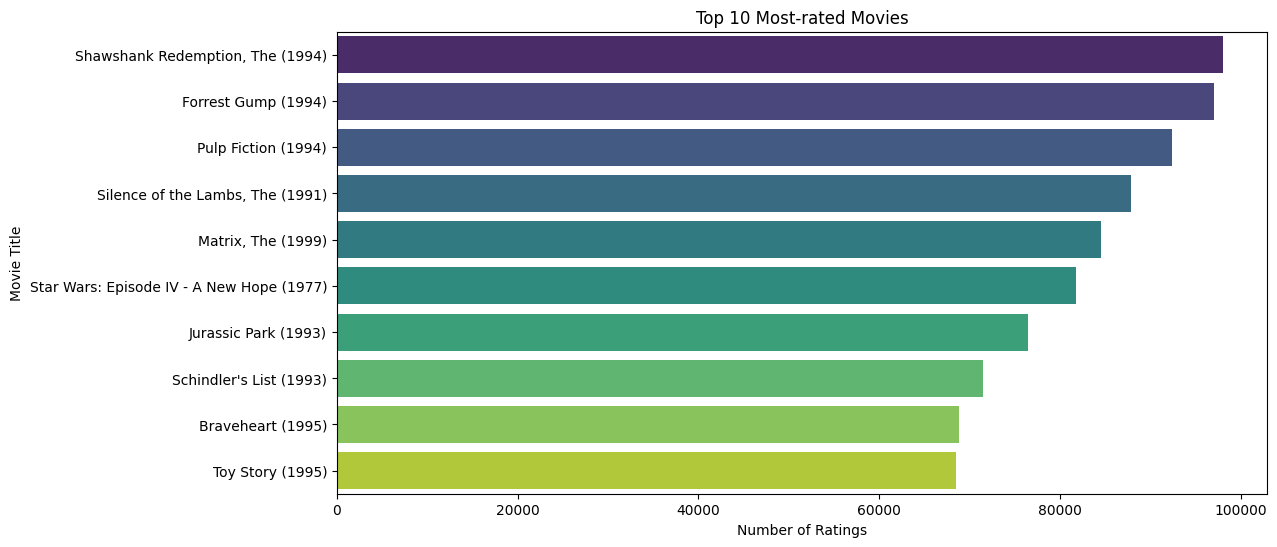

In [5]:
plot_most_rated_movies(merged_df)


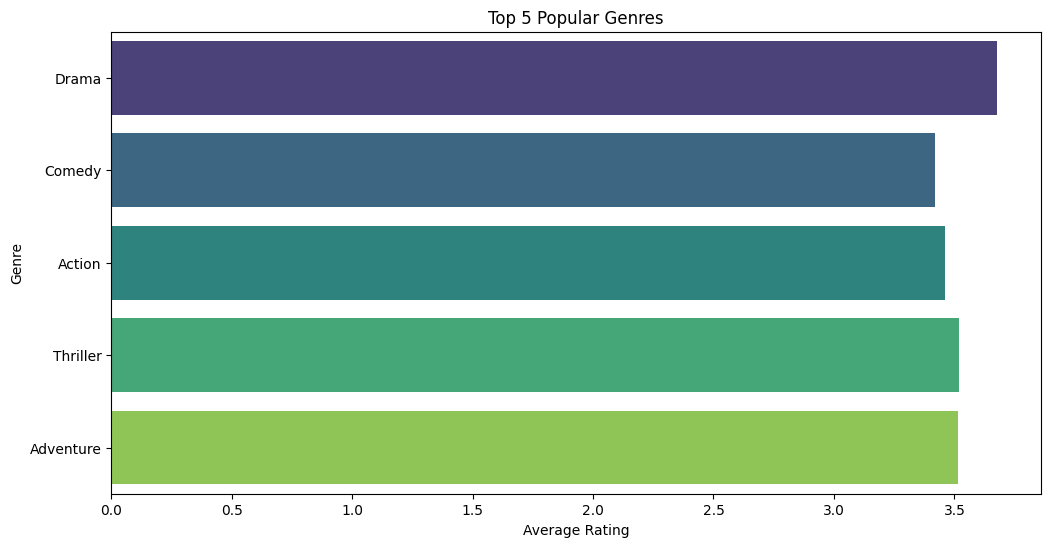

In [6]:
plot_popular_genres(merged_df)


In [6]:
import regex as re
def extract_year(title):
    year = re.search(r'\((\d{4})\)', title)
    if year:
        return int(year.group(1))
    else:
        return None


def year_wise_analysis(df):
    df['year'] = df['title'].apply(extract_year)
    df_year_group = df.groupby('year').agg({'title': 'count', 'rating': 'mean'}).reset_index(
    ).rename(columns={'title': 'num_movies', 'rating': 'avg_rating'}).sort_values('year')
    return df_year_group


# Example usage
merged_df['year'] = merged_df['title'].apply(extract_year)


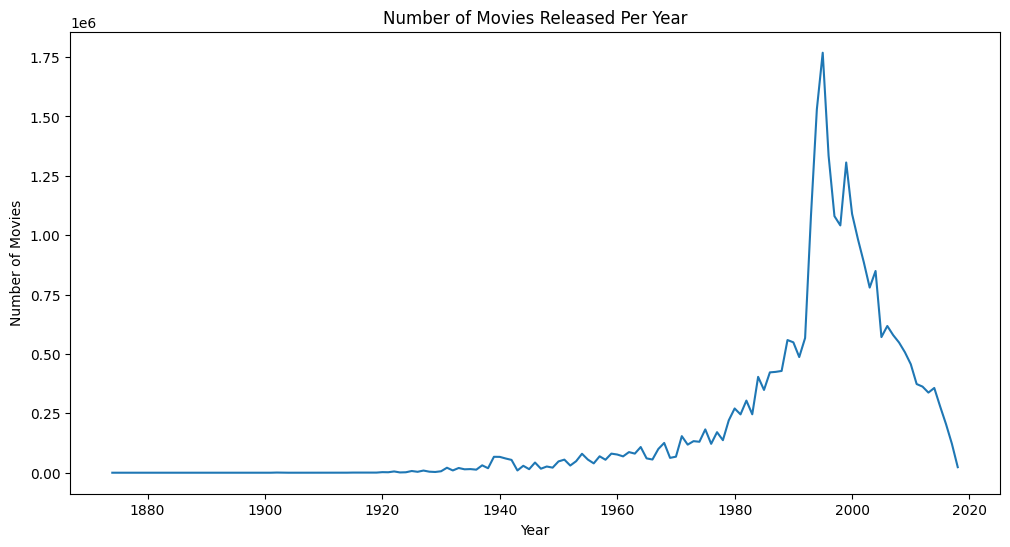

In [7]:
plot_movies_per_year(merged_df)


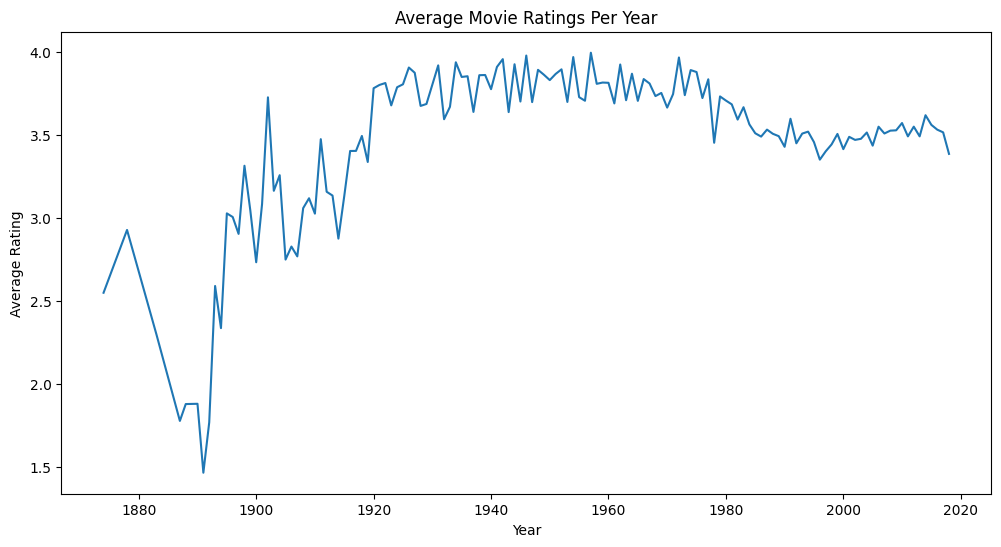

In [8]:
plot_avg_ratings_per_year(merged_df)